In [0]:
import sys
if 'google.colab' in sys.modules:
    # you 1st need to right click on the shared folder and select 'Add to my Drive'
    from google.colab import drive
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)"
    lga_path = '/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/nigeria-lgas/new_lga_nigeria_2003.shp'
else:
    # running locally
    path = '../../NG_2015_MIS_11022019_1024_140937_STATA'
    lga_path = '../nigeria-lgas/new_lga_nigeria_2003.shp'

In [0]:
import os
import glob

import numpy as np
import pandas as pd

In [4]:
!ls "{path}"/*

'/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGFW72DT':
NGFW72.DOC  NGFW72FL.DCT  NGFW72FL.DO  NGFW72FL.DTA  NGFW72FL.MAP

'/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGHR71DT':
NGHR71FL.DCT  NGHR71FL.DO  NGHR71FL.FRQ  NGHR71FL.FRW  NGHR71FL.MAP

'/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGIR71DT':
NGIR71FL.DCT  NGIR71FL.DOC  NGIR71FL.FRW
NGIR71FL.DO   NGIR71FL.FRQ  NGIR71FL.MAP

'/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGKR71DT':
NGKR71FL.DCT  NGKR71FL.DO  NGKR71FL.MAP

'/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGPR71DT':


In [5]:
for fmap in glob.glob(f'{path}/*/*.MAP'):
    if os.path.isfile(fmap.replace('MAP', 'DTA')):
        print(fmap)
        !grep 'Level:' "{fmap}"

/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGPR71DT/NGPR71FL.MAP
Level: HOUSEHOLD                                       Record: RECORD1
/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGFW72DT/NGFW72FL.MAP
Level: Level 1                                         Record: Fieldworker record


In [6]:
# ds_path = f'{path}/NGFW72DT'
ds_path = f'{path}/NGPR71DT'
# ds_path = f'{path}/NGHR71DT'
!ls -lh "{ds_path}"/*

-rw------- 1 root root  13K Nov 18 14:58 '/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGPR71DT/NGPR71FL.DCT'
-rw------- 1 root root  57K Nov 18 14:58 '/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGPR71DT/NGPR71FL.DO'
-rw------- 1 root root  14M Nov 18 14:58 '/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGPR71DT/NGPR71FL.DTA'
-rw------- 1 root root 1.7M Nov 18 14:58 '/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGPR71DT/NGPR71FL.FRQ'
-rw------- 1 root root 1.7M Nov 18 14:58 '/content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGPR71DT/NGPR71FL.F

In [0]:
map_file = glob.glob(f'{ds_path}/*.MAP')[0]
dta_file = map_file.replace('MAP', 'DTA')

In [8]:
# !cat {map_file}
!head -n25 {map_file}

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `head -n25 /content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGPR71DT/NGPR71FL.MAP'


In [9]:
df = pd.read_stata(dta_file)
df

,hhid,hvidx,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,hv008,hv009,hv010,hv011,hv012,hv013,hv014,hv015,hv016,hv017,hv018,hv019,hv020,hv021,hv022,hv023,hv024,hv025,hv026,hv027,hv028,hv030,hv031,hv032,hv035,hv040,hv041,hv042,hv044,chla,...,hml32a,hml32b,hml32c,hml32d,hml32e,hml32f,hml32g,hml33,hml34,hml35,hmcsidx,sh126,sh127,sh127a,sh127b,sh127c,sh128a,sh129,sh130,sh131,sh136,hmla1,hmlb1,hmlc1,hmld1,hmle1,h6bidx,sh216,sh218a,sh218b,sh218c,sh218d,sh218e,sh218f,sh218g,sh218h,sh218y,sh219,sh221,sh225
0,001002,1,NG6,1,2,1,1,571132,10,2015,1390,4,1,NaN,4,4,2,completed,10,1,1902,NaN,all woman sample,1,sokoto - urban,sokoto - urban,north west,urban,NaN,not selected,0,1901,NaN,NaN,1,282,NaN,selected,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001002,2,NG6,1,2,1,1,571132,10,2015,1390,4,1,NaN,4,4,2,completed,10,1,1902,NaN,all woman sample,1,sokoto - urban,sokoto - urban,north west,urban,NaN,not selected,0,1901,NaN,NaN,1,282,NaN,selected,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,"observed, but has holes","observed, hanging",light blue,conical,single,"yes, campaign",NaN,free,NaN,NaN,2.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001002,3,NG6,1,2,1,1,571132,10,2015,1390,4,1,NaN,4,4,2,completed,10,1,1902,NaN,all woman sample,1,sokoto - urban,sokoto - urban,north west,urban,NaN,not selected,0,1901,NaN,NaN,1,282,NaN,selected,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,refused,99995,NaN,1.0,"observed, but has holes","observed, hanging",light blue,conical,single,"yes, campaign",NaN,free,NaN,NaN,2.0,3.0,4.0,NaN,NaN,3.0,refused,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001002,4,NG6,1,2,1,1,571132,10,2015,1390,4,1,NaN,4,4,2,completed,10,1,1902,NaN,all woman sample,1,sokoto - urban,sokoto - urban,north west,urban,NaN,not selected,0,1901,NaN,NaN,1,282,NaN,selected,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,"observed, but has holes","observed, hanging",light blue,conical,single,"yes, campaign",NaN,free,NaN,NaN,2.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001004,1,NG6,1,4,1,1,571132,10,2015,1390,10,2,NaN,10,10,7,completed,11,1,1902,NaN,all woman sample,1,sokoto - urban,sokoto - urban,north west,urban,NaN,not selected,0,1901,NaN,NaN,5,282,NaN,selected,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38437,333124,2,NG6,333,124,2,333,734090,10,2015,1390,4,1,NaN,4,4,2,completed,27,1,3404,NaN,all woman sample,333,ogun - rural,ogun - rural,south west,rural,NaN,not selected,0,3401,NaN,NaN,2,21,NaN,selected,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38438,333124,3,NG6,333,124,2,333,734090,10,2015,1390,4,1,NaN,4,4,2,completed,27,1,3404,NaN,all woman sample,333,ogun - rural,ogun - rural,south west,rural,NaN,not selected,0,3401,NaN,NaN,2,21,NaN,selected,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,measured,Y7G9V,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,no,no,no,no,no,no,no,no,yes,no,yes,NaN
38439,333124,4,NG6,333,124,2,333,734090,10,2015,1390,4,1,NaN,4,4,2,completed,27,1,3404,NaN,all woman sample,333,ogun - rural,ogun - rural,south west,rural,NaN,not selected,0,3401,NaN,NaN,2,21,NaN,selected,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,measured,V2J4L,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,no,no,no,no,no,no,no,no,y

In [10]:
!grep -A3 "electricity" {map_file}

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `grep -A3 "electricity" /content/drive/My Drive/Omdena Nigeria Challenge/DataSets/DHS/other_formats/NG_2015_MIS_11022019_1024_140937_STATA.zip (Unzipped Files)/NGPR71DT/NGPR71FL.MAP'


### Calculate electricity coverage

In [11]:
# Has electricity?
df.hv206 = df.hv206.apply(lambda v: 1 if v == 'yes' else 0).astype(np.float32)
df.hv206.value_counts()

1.0    19883
0.0    18559
Name: hv206, dtype: int64

In [12]:
# Samples per state
state_e = df.groupby('shstate').hv206.agg(['count', 'mean'])
state_e.head()

,count,mean
shstate,,
sokoto,1194,0.200168
zamfara,1391,0.374551
katsina,1437,0.340988
jigawa,1418,0.348378
yobe,1392,0.349856


In [13]:
# overwrite index (state names) to match nigeria-lgas
state_e.reset_index(inplace=True)
state_e.shstate = state_e.shstate.astype(str)
state_e.loc[state_e.shstate == 'borno - urban', 'shstate'] = 'borno'
state_e.loc[state_e.shstate == 'fct abuja', 'shstate'] = 'abuja'
state_e.loc[state_e.shstate == 'nasarawa', 'shstate'] = 'nassarawa'
state_e.set_index('shstate', drop=True, inplace=True)
state_e

,count,mean
shstate,,
sokoto,1194,0.200168
zamfara,1391,0.374551
katsina,1437,0.340988
jigawa,1418,0.348378
yobe,1392,0.349856
borno,438,0.634703
adamawa,1395,0.172043
gombe,1405,0.598576
bauchi,1412,0.444051


In [17]:
!pip install -q geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
ng = gpd.read_file(lga_path)
ng

,STATE,LGA,AREA,PERIMETER,LONGITUDE,LATITUDE,FULL_NAME,geometry
0,Sokoto,Gada,1193.977,170.095,None,None,None,"POLYGON ((5.53632 13.88793, 5.53480 13.88488, ..."
1,Sokoto,Illela,1298.423,174.726,None,None,None,"POLYGON ((5.53632 13.88793, 5.54517 13.88419, ..."
2,Sokoto,Tangaza,2460.715,209.702,None,None,None,"POLYGON ((4.85548 13.76724, 4.86189 13.78085, ..."
3,Borno,Abadam,2430.515,288.957,None,None,None,"POLYGON ((12.83189 13.39871, 12.83397 13.40439..."
4,Lake,Lake chad,5225.912,497.039,None,None,None,"POLYGON ((13.48608 13.30821, 13.48296 13.31344..."
...,...,...,...,...,...,...,...,...
770,Delta,Isoko North,485.467,169.369,None,None,None,"MULTIPOLYGON (((6.31996 5.63341, 6.32003 5.633..."
771,Niger,Lavun,3951.431,424.153,None,None,None,"MULTIPOLYGON (((6.12188 9.09441, 6.12001 9.094..."
772,Yobe,Bade,817.260,216.207,None,None,None,"MULTIPOLYGON (((11.01052 12.80457, 11.00747 12..."
773,Zamfara,Maru,7795.261,536.500,None,None,None,"MULTIPOLYGON (((6.43894 12.41104, 6.43609 12.4..."


### Check state names

In [18]:
ng.STATE.apply(lambda s: s.lower()).sort_values().unique()

array(['abia', 'abuja', 'adamawa', 'akwa ibom', 'anambra', 'bauchi',
       'bayelsa', 'benue', 'borno', 'cross river', 'delta', 'ebonyi',
       'edo', 'ekiti', 'enugu', 'gombe', 'imo', 'jigawa', 'kaduna',
       'kano', 'katsina', 'kebbi', 'kogi', 'kwara', 'lagos', 'lake',
       'nassarawa', 'niger', 'ogun', 'ondo', 'osun', 'oyo', 'plateau',
       'rivers', 'sokoto', 'taraba', 'yobe', 'zamfara'], dtype=object)

In [19]:
state_e.index

Index(['sokoto', 'zamfara', 'katsina', 'jigawa', 'yobe', 'borno', 'adamawa',
       'gombe', 'bauchi', 'kano', 'kaduna', 'kebbi', 'niger', 'abuja',
       'nassarawa', 'plateau', 'taraba', 'benue', 'kogi', 'kwara', 'oyo',
       'osun', 'ekiti', 'ondo', 'edo', 'anambra', 'enugu', 'ebonyi',
       'cross river', 'akwa ibom', 'abia', 'imo', 'rivers', 'bayelsa', 'delta',
       'lagos', 'ogun'],
      dtype='object', name='shstate')

In [20]:
[s for s in ng.STATE.apply(lambda s: s.lower()).tolist() if s not in state_e.index.tolist()]

['lake']

In [21]:
ng['e_supply'] = ng.STATE.apply(lambda s: s.lower()).map(state_e['mean']).fillna(0)
ng.set_index('STATE', drop=True)['e_supply']

STATE
Sokoto       0.200168
Sokoto       0.200168
Sokoto       0.200168
Borno        0.634703
Lake         0.000000
               ...   
Delta        0.752747
Niger        0.423881
Yobe         0.349856
Zamfara      0.374551
Akwa Ibom    0.827014
Name: e_supply, Length: 775, dtype: float32

### Plot demand

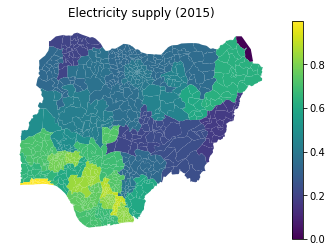

In [23]:
# high demand in blue
states = ng.groupby('STATE')
ax = ng.plot(column='e_supply', legend=True)
ax.set_title('Electricity supply (2015)')
ax.set_axis_off()